In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import os
from datetime import datetime
import darts as dt
import seaborn as sns

In [2]:
ticker = yf.Ticker(ticker='AAPL').history('1y')

In [3]:
filepath = "/Users/mudit.000/OneDrive - University of Essex/Documents/GitHub/Personal-Research-Learning/Personal-Research-Learning/NSE-Stock-Historical-Data/v1"

In [4]:
dp = pl.read_csv(filepath + "/3IINFOLTD.NS.csv")

In [5]:
stocklist = []
stocknames = []

In [6]:
for files in os.listdir(filepath):
    stocknames.append(files)
    stocklist.append(pl.read_csv(filepath + "/" + files))

In [7]:
stocknames = pl.Series(stocknames)

In [8]:
stocknames = stocknames.str.replace(".NS.csv", "")

In [9]:
stocknames

shape: (1_940,)
Series: '' [str]
[
	"20MICRONS"
	"21STCENMGM"
	"360ONE"
	"3IINFOLTD"
	"3MINDIA"
	…
	"ZOTA"
	"ZUARI"
	"ZUARIIND"
	"ZYDUSLIFE"
	"ZYDUSWELL"
]

In [10]:
df = dp.to_pandas()

In [11]:
dp = dp.with_columns(pl.col("Date").str.strptime(dtype=pl.Datetime).alias("Date"))

In [12]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [13]:
df['Date'] = df['Date'].str.slice(start=0, stop=11)

In [14]:
temp = []
for x in stocklist:
    temp.append(x.with_columns(pl.col('Date').str.slice(0,10).alias('Date')))

stocklist = temp

In [15]:
temp = pl.DataFrame()
i = 0
for x in stocklist:
    try:
        temp = temp.vstack(x)
        i += 1
    except:
        print(i)
        break

25


In [16]:
df

Date        Open        High         Low       Close   Volume  \
0     2005-04-22   520.664895  520.664895  423.591779  432.857849  3304177   
1     2005-04-25   436.387792  439.917724  415.649444  419.002869  1021511   
2     2005-04-26   422.091553  424.739001  410.795783  412.119507   680155   
3     2005-04-27   412.119501  449.007275  407.530580  424.033020  1872361   
4     2005-04-28   423.591803  435.505322  417.679156  421.650330   741207   
...           ...         ...         ...         ...         ...      ...   
4569  2023-10-26    36.000000   36.599998   34.650002   35.700001   770037   
4570  2023-10-27    36.099998   36.950001   35.900002   36.599998   573842   
4571  2023-10-30    36.799999   37.349998   36.250000   36.900002   400942   
4572  2023-10-31    37.099998   37.450001   36.200001   36.400002   353270   
4573  2023-11-01    36.400002   37.950001   36.400002   37.299999   485370   

      Dividends  Stock Splits  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  
...         ...           ...  
4569        0.0           0.0  
4570        0.0           0.0  
4571        0.0           0.0  
4572        0.0           0.0  
4573        0.0           0.0  

[4574 rows x 8 columns]

In [17]:
logdf = np.log(df["Close"] ) - np.log(df["Open"])

In [18]:
temp = []
for x in stocklist:
    temp.append(pl.Series(np.log(x["Close"] ) - np.log(x["Open"])))
logstock = temp

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\polars\series\series.py:1458: RuntimeWarning: invalid value encountered in log
  lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs),
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\polars\series\series.py:1458: RuntimeWarning: divide by zero encountered in log
  lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs),


In [19]:
stocklist[6]

shape: (1_425, 8)
┌────────────┬────────────┬────────────┬────────────┬────────────┬────────┬───────────┬────────┐
│ Date       ┆ Open       ┆ High       ┆ Low        ┆ Close      ┆ Volume ┆ Dividends ┆ Stock  │
│ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---    ┆ ---       ┆ Splits │
│ str        ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆ i64    ┆ f64       ┆ ---    │
│            ┆            ┆            ┆            ┆            ┆        ┆           ┆ f64    │
╞════════════╪════════════╪════════════╪════════════╪════════════╪════════╪═══════════╪════════╡
│ 2018-01-19 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 36400  ┆ 0.0       ┆ 0.0    │
│ 2018-01-22 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 0      ┆ 0.0       ┆ 0.0    │
│ 2018-01-23 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 0      ┆ 0.0       ┆ 0.0    │
│ 2018-01-24 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 0      ┆ 0.0       ┆ 0.0    │
│ 2018-01-25 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 104.199997 ┆ 0      ┆ 0.0       ┆ 0.0    │
│ …          ┆ …          ┆ …          ┆ …          ┆ …          ┆ …      ┆ …         ┆ …      │
│ 2023-10-25 ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 0      ┆ 0.0       ┆ 0.0    │
│ 2023-10-26 ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 0      ┆ 0.0       ┆ 0.0    │
│ 2023-10-27 ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 0      ┆ 0.0       ┆ 0.0    │
│ 2023-10-30 ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 0      ┆ 0.0       ┆ 0.0    │
│ 2023-10-31 ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 64.599998  ┆ 0      ┆ 0.0       ┆ 0.0    │
└────────────┴────────────┴────────────┴────────────┴────────────┴────────┴───────────┴────────┘

In [20]:
logstock

[shape: (3_714,)
 Series: 'Close' [f64]
 [
 	-0.86899
 	-0.062873
 	-0.05506
 	-0.070715
 	0.014301
 	…
 	0.0
 	0.0
 	0.0
 	0.0
 	0.0
 ],
 shape: (1_434,)
 Series: 'Close' [f64]
 [
 	0.0
 	0.0
 	0.0
 	0.0
 	0.0
 	…
 	0.01087
 	-0.01087
 	0.002743
 	-0.021859
 	-0.008392
 ],
 shape: (1_022,)
 Series: 'Close' [f64]
 [
 	0.04879
 	0.003755
 	0.0
 	0.0
 	-0.094504
 	…
 	0.000672
 	-0.005327
 	-0.008935
 	0.003052
 	0.007026
 ],
 shape: (4_574,)
 Series: 'Close' [f64]
 [
 	-0.184697
 	-0.040654
 	-0.023909
 	0.028498
 	-0.004594
 	…
 	-0.008368
 	0.013755
 	0.002714
 	-0.019048
 	0.024424
 ],
 shape: (5_300,)
 Series: 'Close' [f64]
 [
 	0.013152
 	-0.00692
 	-0.000509
 	0.091478
 	-0.03767
 	…
 	-0.004684
 	0.022893
 	-0.00963
 	0.003792
 	0.012689
 ],
 shape: (3_838,)
 Series: 'Close' [f64]
 [
 	0.004677
 	0.002963
 	-0.035612
 	0.026095
 	0.057679
 	…
 	-0.043745
 	0.042048
 	0.0
 	-0.040822
 	0.015209
 ],
 shape: (1_425,)
 Series: 'Close' [f64]
 [
 	0.0
 	0.0
 	0.0
 	0.0
 	0.0
 	…
 	0.0


In [21]:
df

Date        Open        High         Low       Close   Volume  \
0     2005-04-22   520.664895  520.664895  423.591779  432.857849  3304177   
1     2005-04-25   436.387792  439.917724  415.649444  419.002869  1021511   
2     2005-04-26   422.091553  424.739001  410.795783  412.119507   680155   
3     2005-04-27   412.119501  449.007275  407.530580  424.033020  1872361   
4     2005-04-28   423.591803  435.505322  417.679156  421.650330   741207   
...           ...         ...         ...         ...         ...      ...   
4569  2023-10-26    36.000000   36.599998   34.650002   35.700001   770037   
4570  2023-10-27    36.099998   36.950001   35.900002   36.599998   573842   
4571  2023-10-30    36.799999   37.349998   36.250000   36.900002   400942   
4572  2023-10-31    37.099998   37.450001   36.200001   36.400002   353270   
4573  2023-11-01    36.400002   37.950001   36.400002   37.299999   485370   

      Dividends  Stock Splits  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  
...         ...           ...  
4569        0.0           0.0  
4570        0.0           0.0  
4571        0.0           0.0  
4572        0.0           0.0  
4573        0.0           0.0  

[4574 rows x 8 columns]

In [22]:
temp = []
for i in range(len(stocklist)):
    temp.append(stocklist[i].hstack([logstock[i].alias("Log Return")]))
stocklist = temp

In [23]:
stocklist

[shape: (3_714, 9)
 ┌────────────┬────────────┬────────────┬───────────┬───┬──────────┬───────────┬────────┬───────────┐
 │ Date       ┆ Open       ┆ High       ┆ Low       ┆ … ┆ Volume   ┆ Dividends ┆ Stock  ┆ Log       │
 │ ---        ┆ ---        ┆ ---        ┆ ---       ┆   ┆ ---      ┆ ---       ┆ Splits ┆ Return    │
 │ str        ┆ f64        ┆ f64        ┆ f64       ┆   ┆ i64      ┆ f64       ┆ ---    ┆ ---       │
 │            ┆            ┆            ┆           ┆   ┆          ┆           ┆ f64    ┆ f64       │
 ╞════════════╪════════════╪════════════╪═══════════╪═══╪══════════╪═══════════╪════════╪═══════════╡
 │ 2008-10-06 ┆ 35.138197  ┆ 35.138197  ┆ 13.879588 ┆ … ┆ 23501600 ┆ 0.0       ┆ 0.0    ┆ -0.86899  │
 │ 2008-10-07 ┆ 14.055279  ┆ 16.690643  ┆ 12.232485 ┆ … ┆ 9113400  ┆ 0.0       ┆ 0.0    ┆ -0.062873 │
 │ 2008-10-08 ┆ 12.298368  ┆ 12.825442  ┆ 11.024609 ┆ … ┆ 2464384  ┆ 0.0       ┆ 0.0    ┆ -0.05506  │
 │ 2008-10-10 ┆ 10.936764  ┆ 10.936764  ┆ 9.509275  ┆ … ┆ 12079

In [24]:
maslist = stocklist

In [25]:
maslist[1]

shape: (1_434, 9)
┌──────────────┬───────────┬───────────┬───────────┬───┬────────┬───────────┬────────┬─────────────┐
│ Date         ┆ Open      ┆ High      ┆ Low       ┆ … ┆ Volume ┆ Dividends ┆ Stock  ┆ Log Return  │
│ ---          ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---    ┆ ---       ┆ Splits ┆ ---         │
│ str          ┆ f64       ┆ f64       ┆ f64       ┆   ┆ i64    ┆ f64       ┆ ---    ┆ f64         │
│              ┆           ┆           ┆           ┆   ┆        ┆           ┆ f64    ┆             │
╞══════════════╪═══════════╪═══════════╪═══════════╪═══╪════════╪═══════════╪════════╪═════════════╡
│ 2018-01-11   ┆ 31.14629  ┆ 31.14629  ┆ 31.14629  ┆ … ┆ 157    ┆ 0.0       ┆ 0.0    ┆ 0.0         │
│ 2018-01-12   ┆ 31.752428 ┆ 31.752428 ┆ 31.752428 ┆ … ┆ 360    ┆ 0.0       ┆ 0.0    ┆ 0.0         │
│ 2018-01-15   ┆ 32.35857  ┆ 32.35857  ┆ 32.35857  ┆ … ┆ 795    ┆ 0.0       ┆ 0.0    ┆ 0.0         │
│ 2018-01-16   ┆ 32.964706 ┆ 32.964706 ┆ 32.964706 ┆ … ┆ 2735   ┆ 0.0       ┆ 0.0    ┆ 0.0         │
│ 2018-01-17   ┆ 33.617474 ┆ 33.617474 ┆ 33.011335 ┆ … ┆ 56033  ┆ 0.0       ┆ 0.0    ┆ 0.0         │
│ …            ┆ …         ┆ …         ┆ …         ┆ … ┆ …      ┆ …         ┆ …      ┆ …           │
│ 2023-10-26   ┆ 18.299999 ┆ 18.75     ┆ 18.200001 ┆ … ┆ 6333   ┆ 0.0       ┆ 0.0    ┆ 0.01087     │
│ 2023-10-27   ┆ 18.5      ┆ 18.5      ┆ 18.15     ┆ … ┆ 1101   ┆ 0.0       ┆ 0.0    ┆ -0.01087    │
│ 2023-10-30   ┆ 18.200001 ┆ 18.5      ┆ 18.15     ┆ … ┆ 2663   ┆ 0.0       ┆ 0.0    ┆ 0.002743    │
│ 2023-10-31   ┆ 18.5      ┆ 18.5      ┆ 17.9      ┆ … ┆ 6366   ┆ 0.0       ┆ 0.0    ┆ -0.021859   │
│ 2023-11-01   ┆ 17.950001 ┆ 18.299999 ┆ 17.799999 ┆ … ┆ 3806   ┆ 0.0       ┆ 0.0    ┆ -0.008392   │
└──────────────┴───────────┴───────────┴───────────┴───┴────────┴───────────┴────────┴─────────────┘

In [26]:
temp = []
for x in maslist:
    temp.append(x.drop(["Open", "High", "Low", "Close","Volume", "Dividends", "Stock Splits"]))
maslist = temp

In [27]:
temp = []
for x in zip(stocknames, maslist):
    mydict = {"Log Return": x[0]}
    temp.append(x[1].rename(mydict))
loglist = temp

In [28]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path)
from l0bnb import fit_path

In [29]:
Hitters = load_data('Hitters')
np.isnan(Hitters['Salary']).sum()

59

In [75]:
Hitters.head(10)

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1     315    81      7    24   38     39     14    3449    835      69    321   
2     479   130     18    66   72     76      3    1624    457      63    224   
3     496   141     20    65   78     37     11    5628   1575     225    828   
4     321    87     10    39   42     30      2     396    101      12     48   
5     594   169      4    74   51     35     11    4408   1133      19    501   
6     185    37      1    23    8     21      2     214     42       1     30   
7     298    73      0    24   24      7      3     509    108       0     41   
8     323    81      6    26   32      8      2     341     86       6     32   
9     401    92     17    49   66     65     13    5206   1332     253    784   
10    574   159     21   107   75     59     10    4631   1300      90    702   

    CRBI  CWalks League Division  PutOuts  Assists  Errors    Salary NewLeague  
1    414     375      N        W      632       43      10   475.000         N  
2    266     263      A        W      880       82      14   480.000         A  
3    838     354      N        E      200       11       3   500.000         N  
4     46      33      N        E      805       40       4    91.500         N  
5    336     194      A        W      282      421      25   750.000         A  
6      9      24      N        E       76      127       7    70.000         A  
7     37      12      A        W      121      283       9   100.000         A  
8     34       8      N        W      143      290      19    75.000         N  
9    890     866      A        E        0        0       0  1100.000         A  
10   504     488      A        E      238      445      22   517.143         A

In [30]:
Hitters = Hitters.dropna()
Hitters.shape

(263, 20)

In [31]:
def nCp(sigma2 , estimator , X, Y):
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

In [32]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)
sigma2 = OLS(Y,X).fit().scale

In [33]:
neg_Cp = partial(nCp , sigma2)

In [34]:
strategy = Stepwise.first_peak(design ,
direction='forward',
max_terms=len(design.terms))

In [35]:
hitters_MSE = sklearn_selected(OLS ,
strategy)
hitters_MSE.fit(Hitters , Y)
hitters_MSE.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

In [36]:
hitters_Cp = sklearn_selected(OLS ,
strategy ,
scoring=neg_Cp)
hitters_Cp.fit(Hitters , Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

In [37]:
strategy = Stepwise.fixed_steps(design ,
len(design.terms),
direction='forward')
full_path = sklearn_selection_path(OLS , strategy)

In [38]:
full_path.fit(Hitters , Y)
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape

(263, 20)

(50000.0, 250000.0)

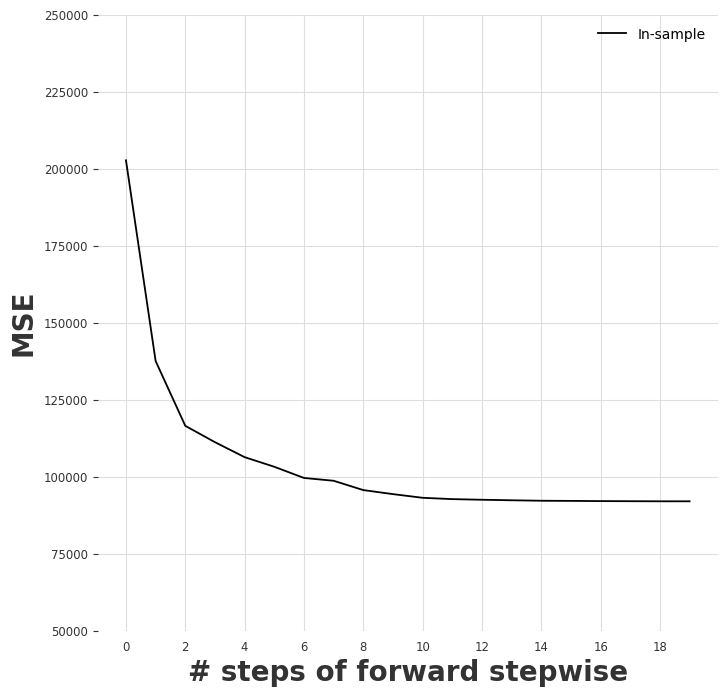

In [39]:
mse_fig , ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
insample_mse ,
'k', # color black
label='In-sample')
ax.set_ylabel('MSE',
fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim ([50000 ,250000])

In [40]:
K = 5
kfold = skm.KFold(K,
random_state=0,
shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path ,
Hitters ,
Y,
cv=kfold)
Yhat_cv.shape

(263, 20)

In [41]:
cv_mse = []
for train_idx , test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx ,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape

(20, 5)

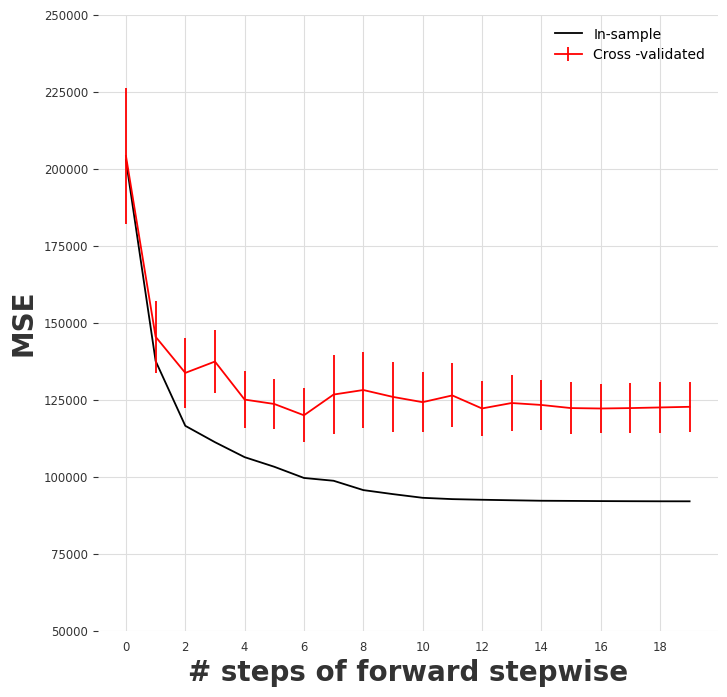

In [42]:
ax.errorbar(np.arange(n_steps),
cv_mse.mean(1),
cv_mse.std(1) / np.sqrt(K),
label='Cross -validated',
c='r') # color red
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

In [43]:
validation = skm.ShuffleSplit(n_splits=1,
test_size=0.2,
random_state=0)
for train_idx , test_idx in validation.split(Y):
    full_path.fit(Hitters.iloc[train_idx],
    Y[train_idx])
    Yhat_val = full_path.predict(Hitters.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx ,None])**2
    validation_mse = errors.mean(0)

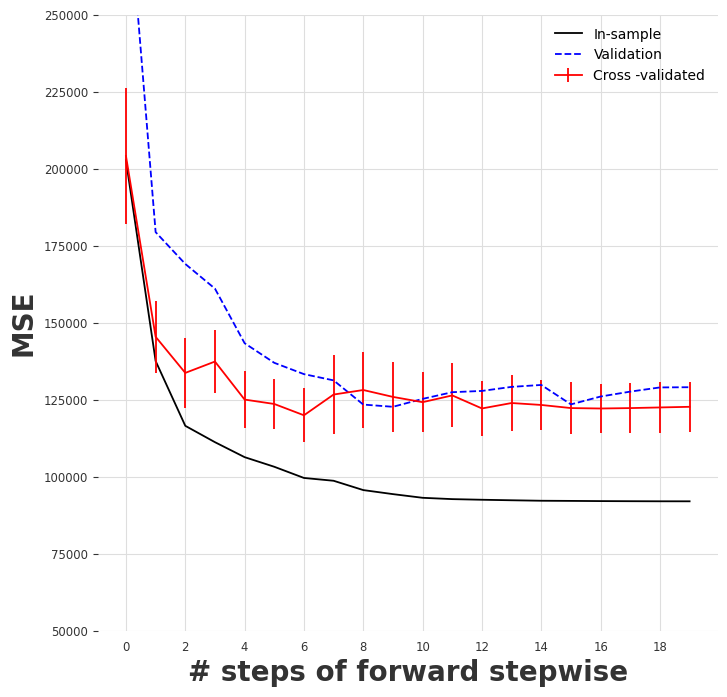

In [44]:
ax.plot(np.arange(n_steps),
    validation_mse ,
    'b--', # color blue, broken line
    label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

In [45]:
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [46]:
path = fit_path(X,Y,max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  3
Iteration: 6. Number of non-zeros:  3
Iteration: 7. Number of non-zeros:  4
Iteration: 8. Number of non-zeros:  9
Iteration: 9. Number of non-zeros:  9
Iteration: 10. Number of non-zeros:  9
Iteration: 11. Number of non-zeros:  9
Iteration: 12. Number of non-zeros:  9
Iteration: 13. Number of non-zeros:  9
Iteration: 14. Number of non-zeros:  9
Iteration: 15. Number of non-zeros:  9
Iteration: 16. Number of non-zeros:  9
Iteration: 17. Number of non-zeros:  9
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  19


In [47]:
path[3]

{'B': array([0.        , 3.25484367, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.67775265, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': -38.98216739555505,
 'lambda_0': 0.011416248027450187,
 'M': 0.5829861733382012,
 'Time_exceeded': False}

In [76]:
path[4]

{'B': array([   0.        ,    3.13128866,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.67695124,
           0.        ,    0.        , -137.72478629,    0.        ,
           0.        ,    0.        ,    0.        ]),
 'B0': 44.77699685800354,
 'lambda_0': 0.010845435626077676,
 'M': 0.5829861733382012,
 'Time_exceeded': False}

In [48]:
Xs = X - X.mean(0)[None ,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None ,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
Y,
l1_ratio=0.,
alphas=lambdas)[1]
soln_array.shape

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64428165.36474803, tolerance: 12885.7065737425
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarni

(19, 100)

In [49]:
soln_path = pd.DataFrame(soln_array.T,
columns=D.columns ,
index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

AtBat        Hits      HmRun       Runs        RBI  \
negative log(lambda)                                                            
-12.310855              0.000800    0.000889   0.000695   0.000851   0.000911   
-12.078271              0.001010    0.001122   0.000878   0.001074   0.001150   
-11.845686              0.001274    0.001416   0.001107   0.001355   0.001451   
-11.613102              0.001608    0.001787   0.001397   0.001710   0.001831   
-11.380518              0.002029    0.002255   0.001763   0.002158   0.002310   
...                          ...         ...        ...        ...        ...   
 9.784658            -290.823989  336.929968  37.322686 -59.748520 -26.507086   
 10.017243           -290.879272  337.113713  37.431373 -59.916820 -26.606957   
 10.249827           -290.923382  337.260446  37.518064 -60.051166 -26.686604   
 10.482412           -290.958537  337.377455  37.587122 -60.158256 -26.750044   
 10.714996           -290.986528  337.470648  37.642077 -60.243522 -26.800522   

                           Walks      Years      CAtBat      CHits     CHmRun  \
negative log(lambda)                                                            
-12.310855              0.000900   0.000812    0.001067   0.001113   0.001064   
-12.078271              0.001135   0.001025    0.001346   0.001404   0.001343   
-11.845686              0.001433   0.001293    0.001698   0.001772   0.001694   
-11.613102              0.001808   0.001632    0.002143   0.002236   0.002138   
-11.380518              0.002281   0.002059    0.002704   0.002821   0.002698   
...                          ...        ...         ...        ...        ...   
 9.784658             134.855915 -17.216195 -387.775826  89.573601 -12.273926   
 10.017243            134.900549 -17.108041 -388.458404  89.000707 -12.661459   
 10.249827            134.936136 -17.022194 -388.997470  88.537380 -12.971603   
 10.482412            134.964477 -16.954081 -389.423414  88.164178 -13.219329   
 10.714996            134.987027 -16.900054 -389.760135  87.864551 -13.416889   

                           CRuns        CRBI      CWalks  League[N]  \
negative log(lambda)                                                  
-12.310855              0.001141    0.001149    0.000993  -0.000029   
-12.078271              0.001439    0.001450    0.001253  -0.000037   
-11.845686              0.001816    0.001830    0.001581  -0.000046   
-11.613102              0.002292    0.002309    0.001995  -0.000058   
-11.380518              0.002892    0.002914    0.002517  -0.000073   
...                          ...         ...         ...        ...   
 9.784658             476.079273  257.271255 -213.124780  31.258215   
 10.017243            477.031349  257.966790 -213.280891  31.256434   
 10.249827            477.791860  258.523025 -213.405740  31.254958   
 10.482412            478.398404  258.967059 -213.505412  31.253747   
 10.714996            478.881540  259.321007 -213.584869  31.252760   

                      Division[W]    PutOuts    Assists     Errors  \
negative log(lambda)                                                 
-12.310855              -0.000390   0.000609   0.000052  -0.000011   
-12.078271              -0.000492   0.000769   0.000065  -0.000014   
-11.845686              -0.000621   0.000970   0.000082  -0.000017   
-11.613102              -0.000784   0.001224   0.000104  -0.000022   
-11.380518              -0.000990   0.001544   0.000131  -0.000028   
...                           ...        ...        ...        ...   
 9.784658              -58.457857  78.761266  53.622113 -22.208456   
 10.017243             -58.448850  78.761240  53.645147 -22.198802   
 10.249827             -58.441682  78.761230  53.663357 -22.191071   
 10.482412             -58.435983  78.761230  53.677759 -22.184893   
 10.714996             -58.431454  78.761235  53.689152 -22.179964   

                      NewLeague[N]  
negative log(lambda)                
-12.310855

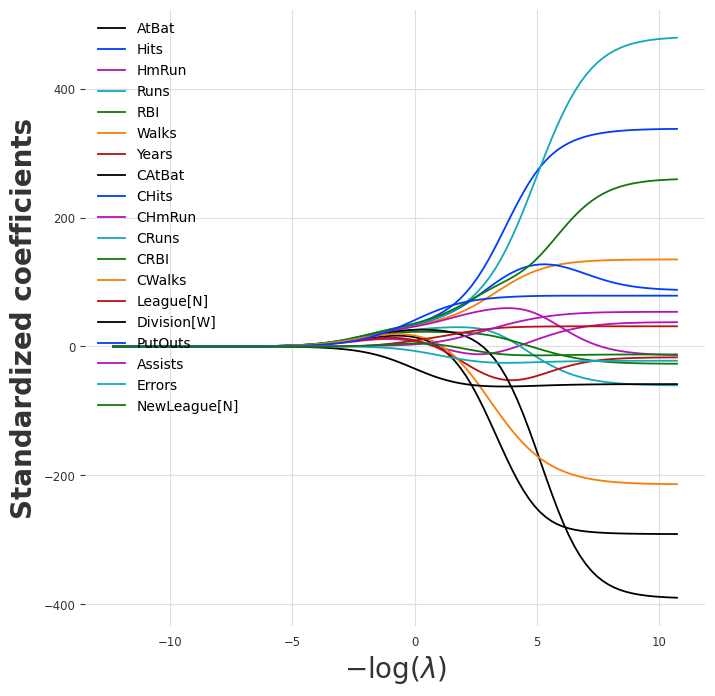

In [50]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left')

In [51]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(25.53538897200662,
 AtBat           5.433750
 Hits            6.223582
 HmRun           4.585498
 Runs            5.880855
 RBI             6.195921
 Walks           6.277975
 Years           5.299767
 CAtBat          7.147501
 CHits           7.539495
 CHmRun          7.182344
 CRuns           7.728649
 CRBI            7.790702
 CWalks          6.592901
 League[N]       0.042445
 Division[W]    -3.107159
 PutOuts         4.605263
 Assists         0.378371
 Errors         -0.135196
 NewLeague[N]    0.150323
 Name: -3.240065292879872, dtype: float64)

In [52]:
np.linalg.norm(beta_hat)

24.170617201443775

In [53]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)

(0.24374766133488554, 160.42371017725813)

In [54]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True , with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+07, tolerance: 5.332e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.24374766133488554, l1_ratio=0))])

In [55]:
np.linalg.norm(ridge.coef_)

160.4237101772592

In [56]:
validation = skm.ShuffleSplit(n_splits=1,
test_size=0.5,
random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge ,
X,
Y,
scoring='neg_mean_squared_error',
cv=validation)
-results['test_score']

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.486e+06, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([134214.00419204])

In [57]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge ,
X,
Y,
scoring='neg_mean_squared_error',
cv=validation)
-results['test_score']

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([231788.32155285])

In [58]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe ,
param_grid ,
cv=validation ,
scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisat

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.005899006046740856, l1_ratio=0))])

In [59]:
grid = skm.GridSearchCV(pipe ,
param_grid ,
cv=kfold ,
scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisat

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.01185247763144249, l1_ratio=0))])

Text(0, 0.5, 'Cross -validated MSE')

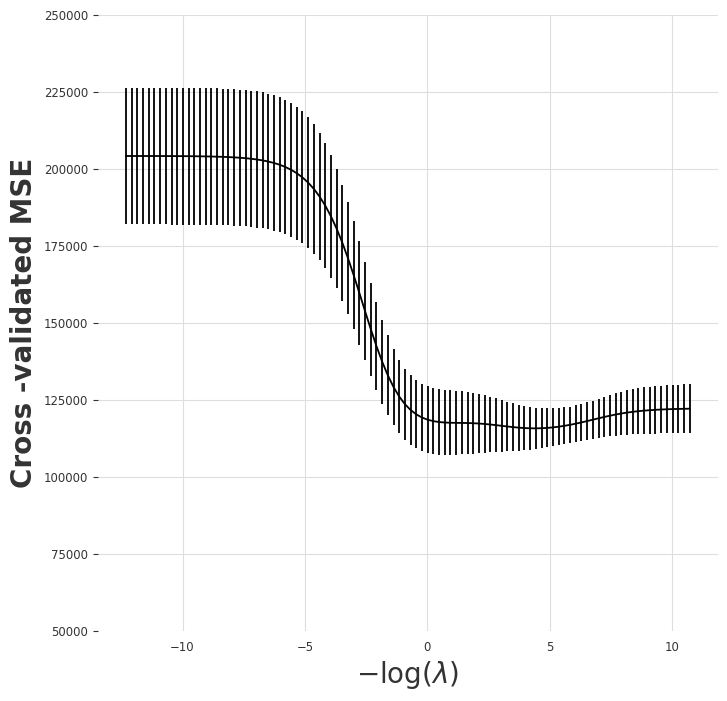

In [60]:
ridge_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
-grid.cv_results_['mean_test_score'],
yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20)

In [61]:
grid_r2 = skm.GridSearchCV(pipe ,
param_grid ,
cv=kfold)
grid_r2.fit(X, Y)

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisat

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        ElasticNet(alpha=10000000000.0,
                                                   l1_ratio=0))]),
             param_grid={'ridge__alpha': array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606...
       4.67486141e-03, 3.70474772e-03, 2.93594921e-03, 2.32668954e-03,
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05])})

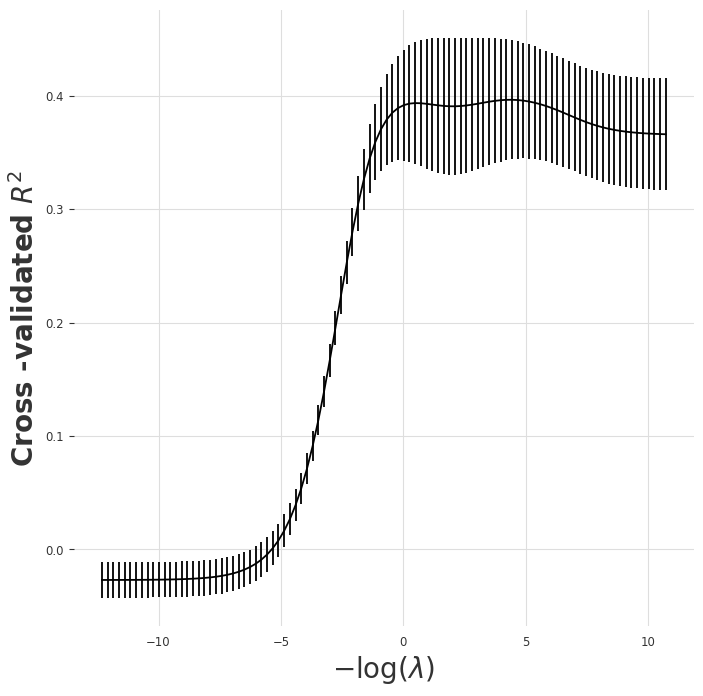

In [62]:
r2_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
grid_r2.cv_results_['mean_test_score'],
yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated $R^2$', fontsize=20);

In [63]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas ,
l1_ratio=0,
cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),('ridge', ridgeCV)])
pipeCV.fit(X, Y)

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18795326.355502337, tolerance: 3759.1091668691934
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWa

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606e+04, 2.16987845e+04, 1.71959156e+04,
       1.36274691e+04, 1.07995362e+04, 8.55844774e+03, 6.78242347e+03,
       5.37495461e+03, 4.25955961e+03,...
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

Text(0, 0.5, 'Cross -validated MSE')

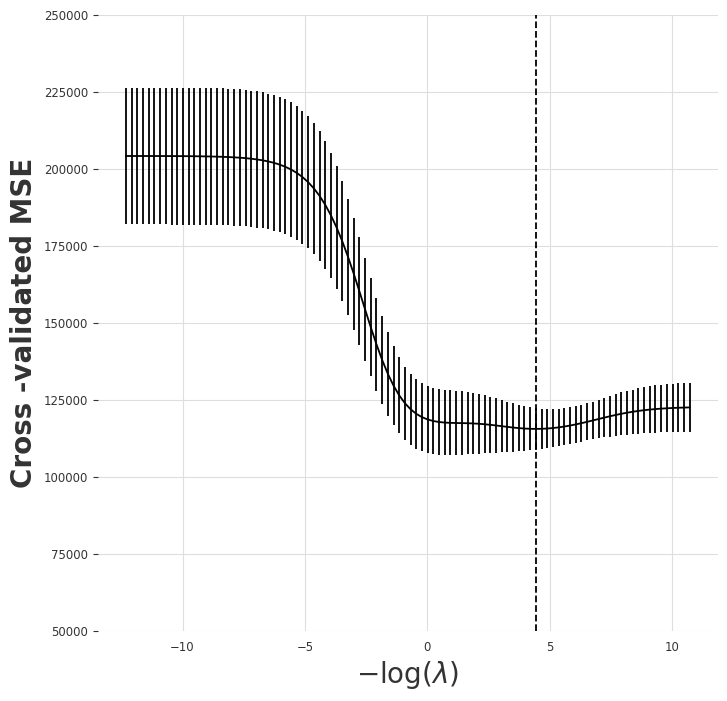

In [64]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
tuned_ridge.mse_path_.mean(1),
yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20)

In [65]:
np.min(tuned_ridge.mse_path_.mean(1))

115526.70630987766

In [66]:
tuned_ridge.coef_

array([-222.80877051,  238.77246614,    3.21103754,   -2.93050845,
          3.64888723,  108.90953869,  -50.81896152, -105.15731984,
        122.00714801,   57.1859509 ,  210.35170348,  118.05683748,
       -150.21959435,   30.36634231,  -61.62459095,   77.73832472,
         40.07350744,  -25.02151514,  -13.68429544])

In [67]:
outer_valid = skm.ShuffleSplit(n_splits=1,
test_size=0.25,
random_state=1)
inner_cv = skm.KFold(n_splits=5,
shuffle=True ,
random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas ,
l1_ratio=0,
cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
('ridge', ridgeCV)])
results = skm.cross_validate(pipeCV ,
X,
Y,
cv=outer_valid ,
scoring='neg_mean_squared_error')
-results['test_score']

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16002961.89304734, tolerance: 3200.6325551004934
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWar

array([132393.84003227])

In [68]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
l1_ratio=1,
cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

3.1472370031649866

In [69]:
lambdas , soln_array = skl.Lasso.path(Xs,
Y,
l1_ratio=1,
n_alphas =100)[:2]
soln_path = pd.DataFrame(soln_array.T,
columns=D.columns ,
index=-np.log(lambdas))

Text(0, 0.5, 'Standardized coefficiients')

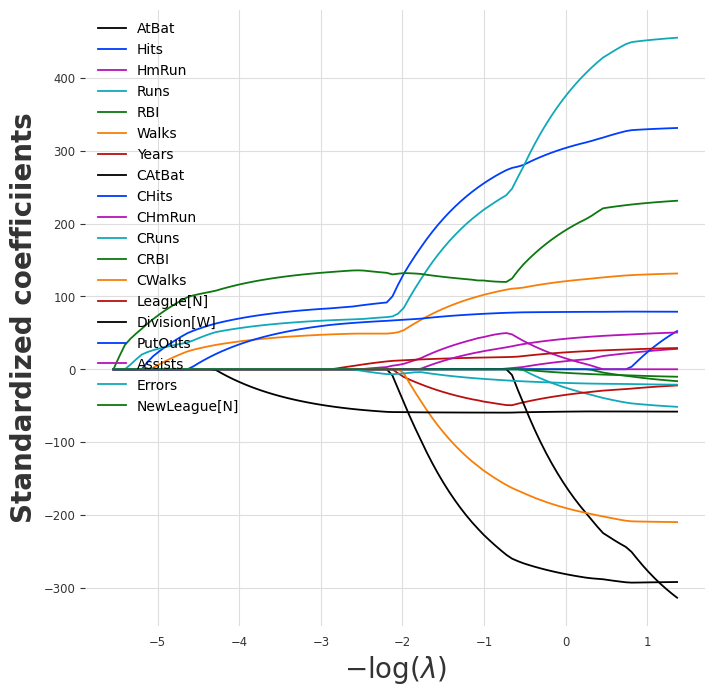

In [70]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20)

In [71]:
np.min(tuned_lasso.mse_path_.mean(1))

114690.731182537

Text(0, 0.5, 'Cross -validated MSE')

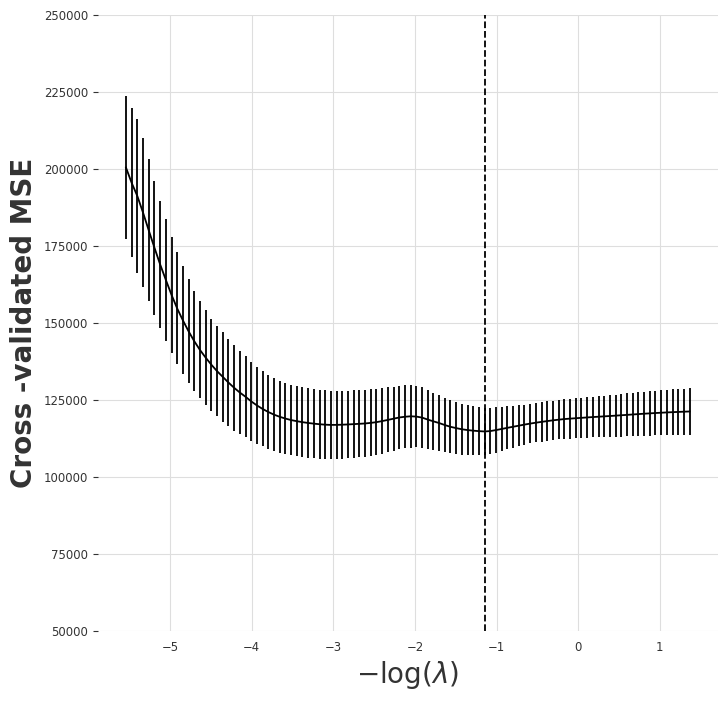

In [72]:
lassoCV_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
tuned_lasso.mse_path_.mean(1),
yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20)

In [73]:
tuned_lasso.coef_

array([-210.01008773,  243.4550306 ,    0.        ,    0.        ,
          0.        ,   97.69397357,  -41.52283116,   -0.        ,
          0.        ,   39.62298193,  205.75273856,  124.55456561,
       -126.29986768,   15.70262427,  -59.50157967,   75.24590036,
         21.62698014,  -12.04423675,   -0.        ])